#`This notebook is an Illustration to create a KNeighborsClassifier with Sklearn using Python 🐍`

For more information, check out the [KNNClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

<img src="https://miro.medium.com/max/753/0*jqxx3-dJqFjXD6FA" height="220" width="300">

## **Setup**
Let's setup the imports:  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

plt.style.use('fivethirtyeight')

# **Exploratory Data Analysis**
Let's load the Diabetes dataset which is uploaded on my Google Drive.

In [ ]:
!gdown --id 1sJQDxSU1ht9jE9KMivNETptV-Z6qWKyl

Downloading...
From: https://drive.google.com/uc?id=1sJQDxSU1ht9jE9KMivNETptV-Z6qWKyl
To: /content/datasets_diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 43.1MB/s]


Let's read the CVS file: 

In [ ]:
df = pd.read_csv('/content/datasets_diabetes.csv') 

First few rows in the DataFrame:

In [ ]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's create a copy of the dataFrame which contains only certain features:

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

We replaced all the null values to NaN for a certain columns:

In [ ]:
df_copy.isnull().sum() 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Let's see the Histogram of Uncleaned data:

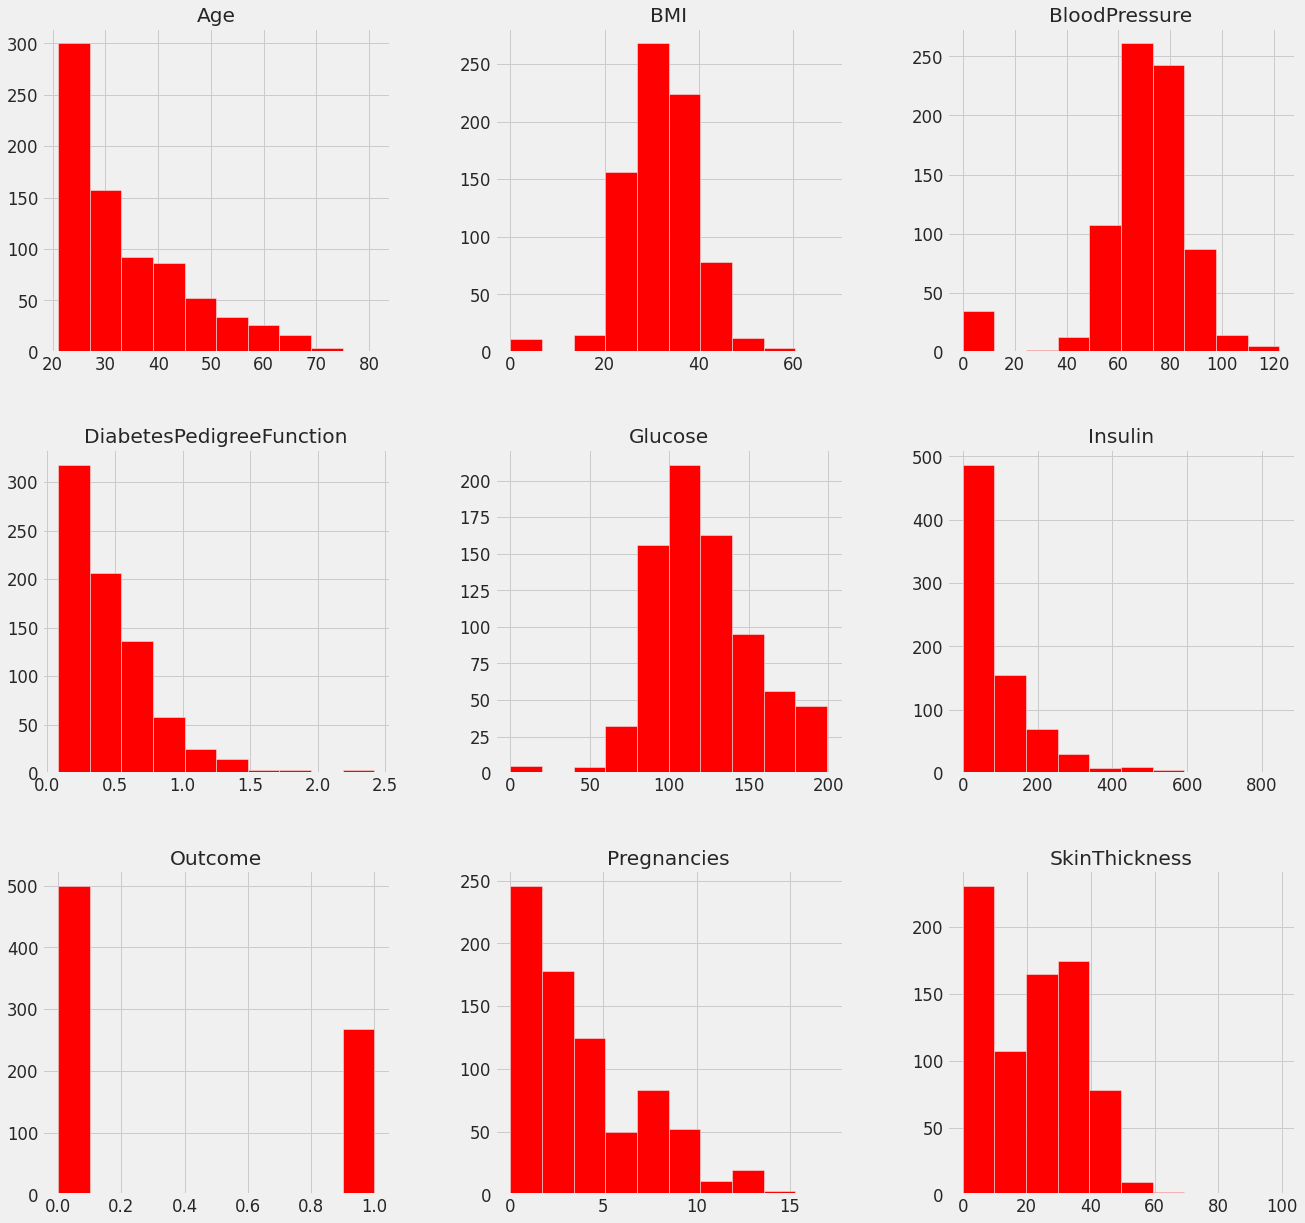

In [ ]:
p = df.hist(figsize = (20,20), color='red')

Let's see the Histogram of cleaned data:

In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True) 
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True) 
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True) 
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True) 
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True) 

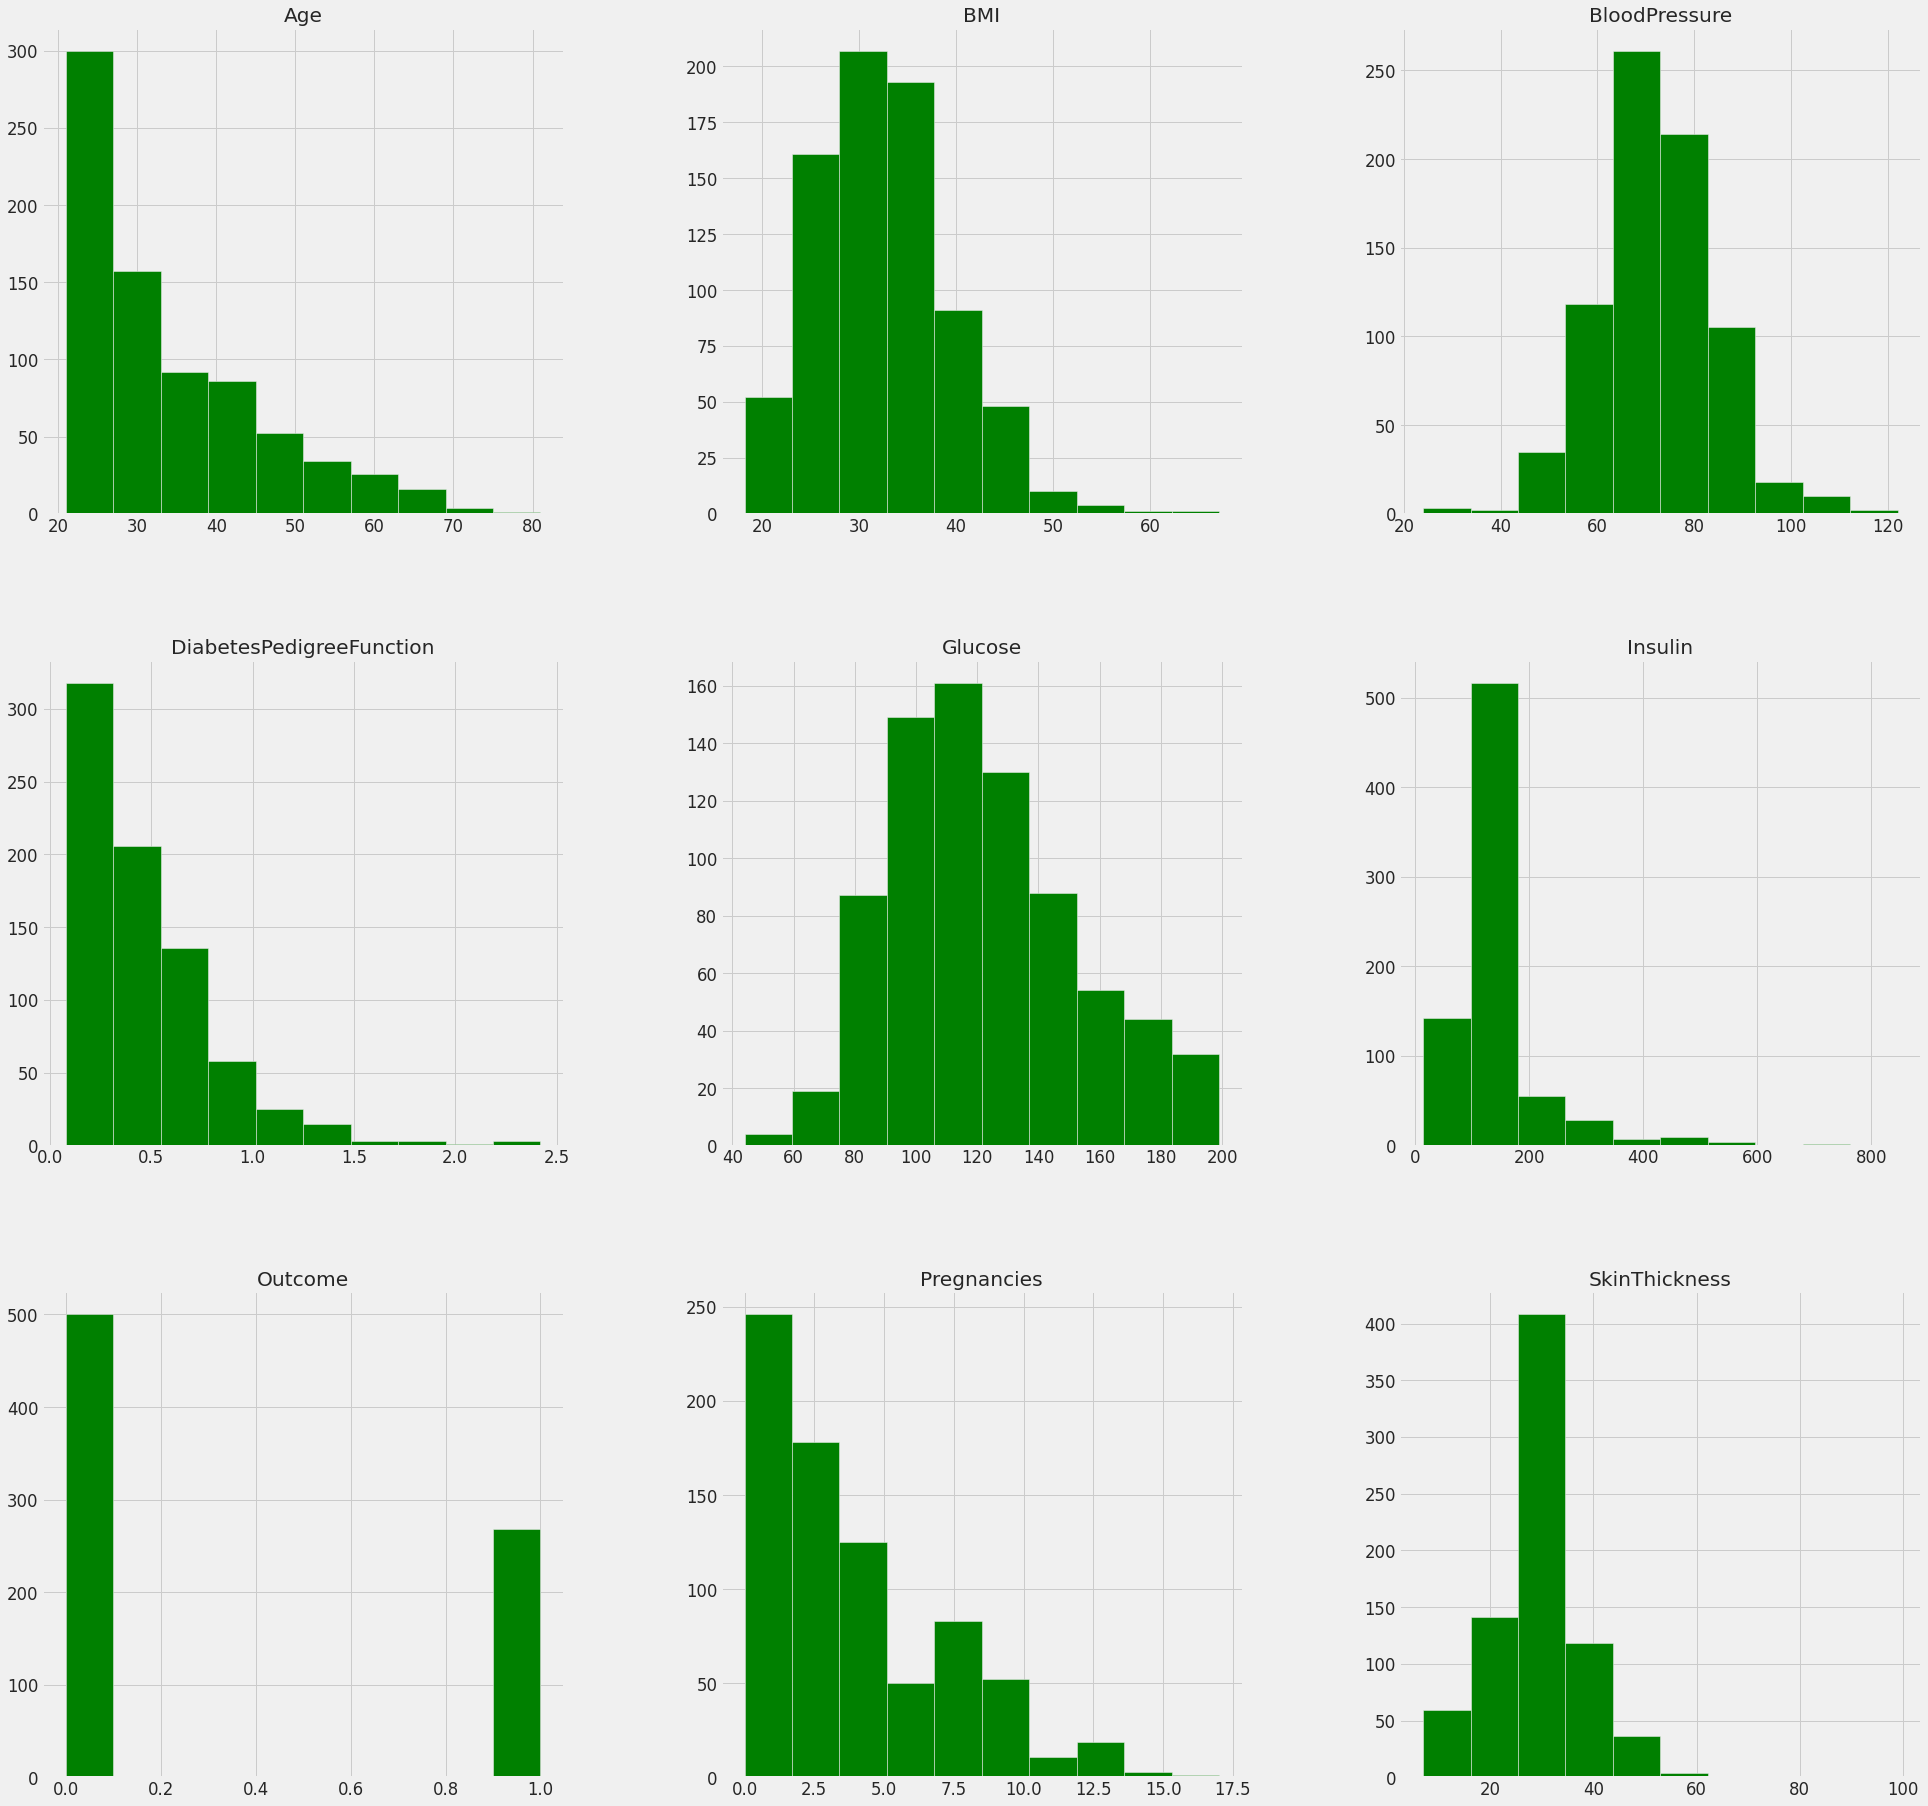

In [ ]:
p = df_copy.hist(figsize = (30, 30), color='green') 

Shape of the DataFrame:

In [ ]:
df.shape

(768, 9)

### Let's take a look at the Scatter Matrix of the Uncleaned Data:

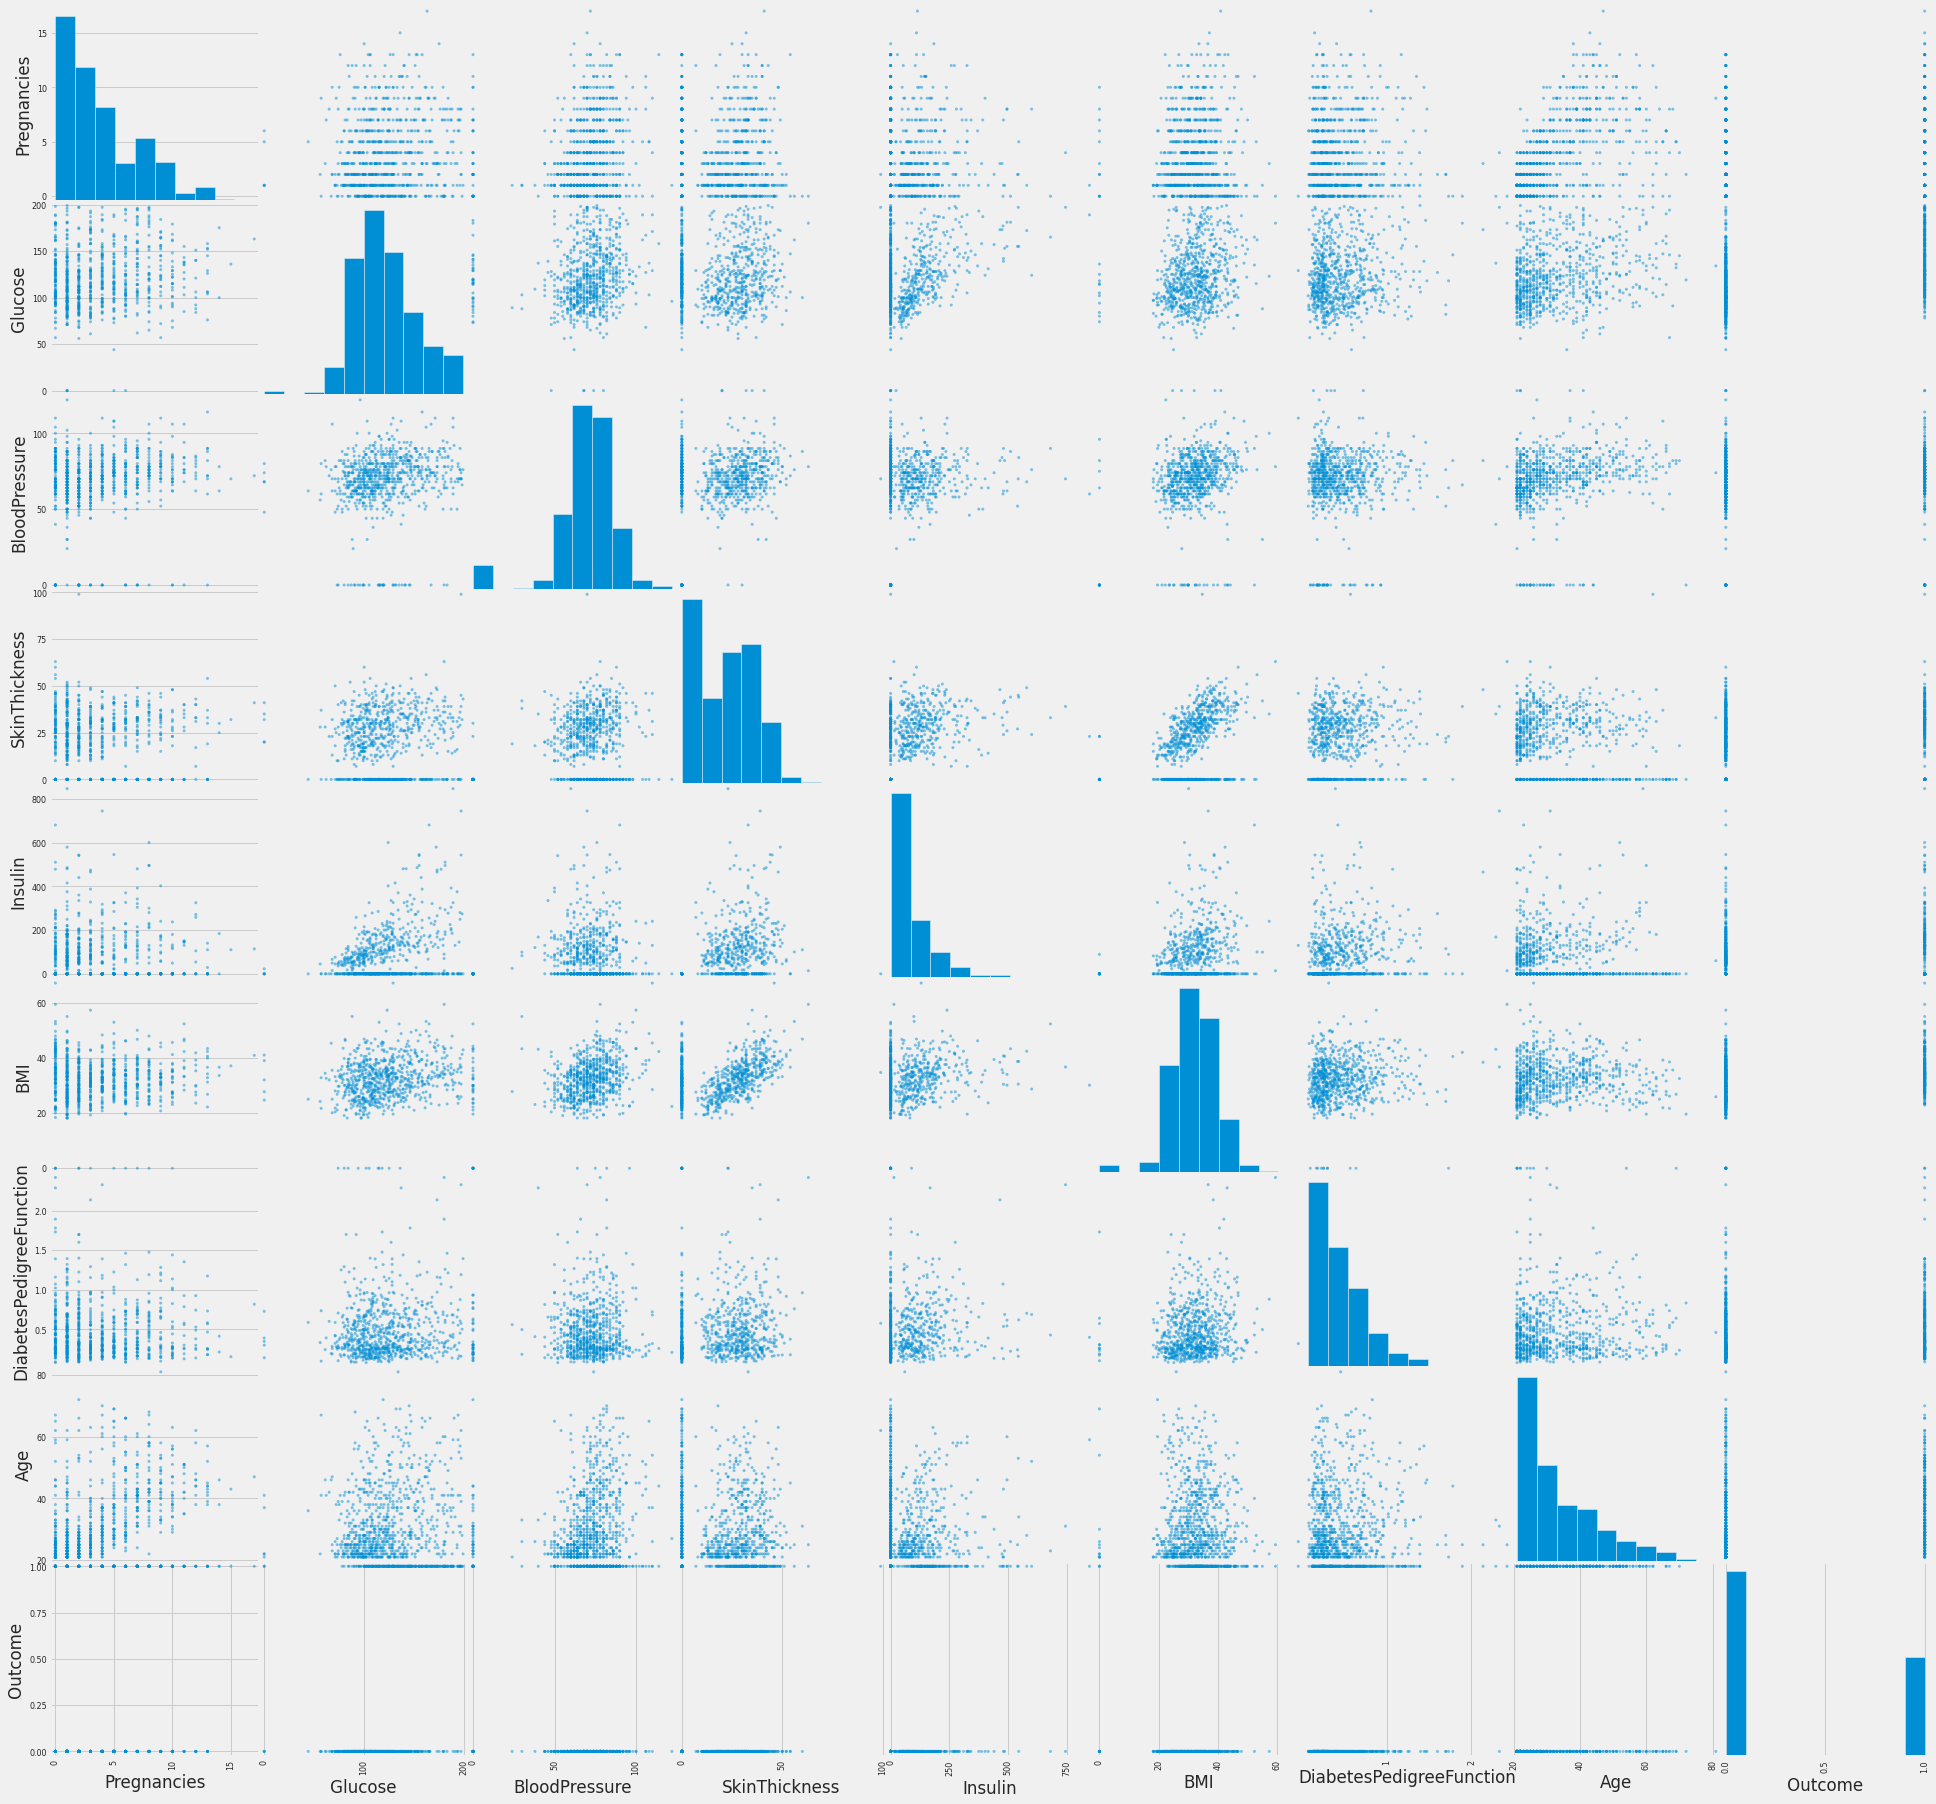

In [ ]:
p = scatter_matrix(df, figsize=(30, 30)) 

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. 

### Let's see the pairplot of Cleaned Data:

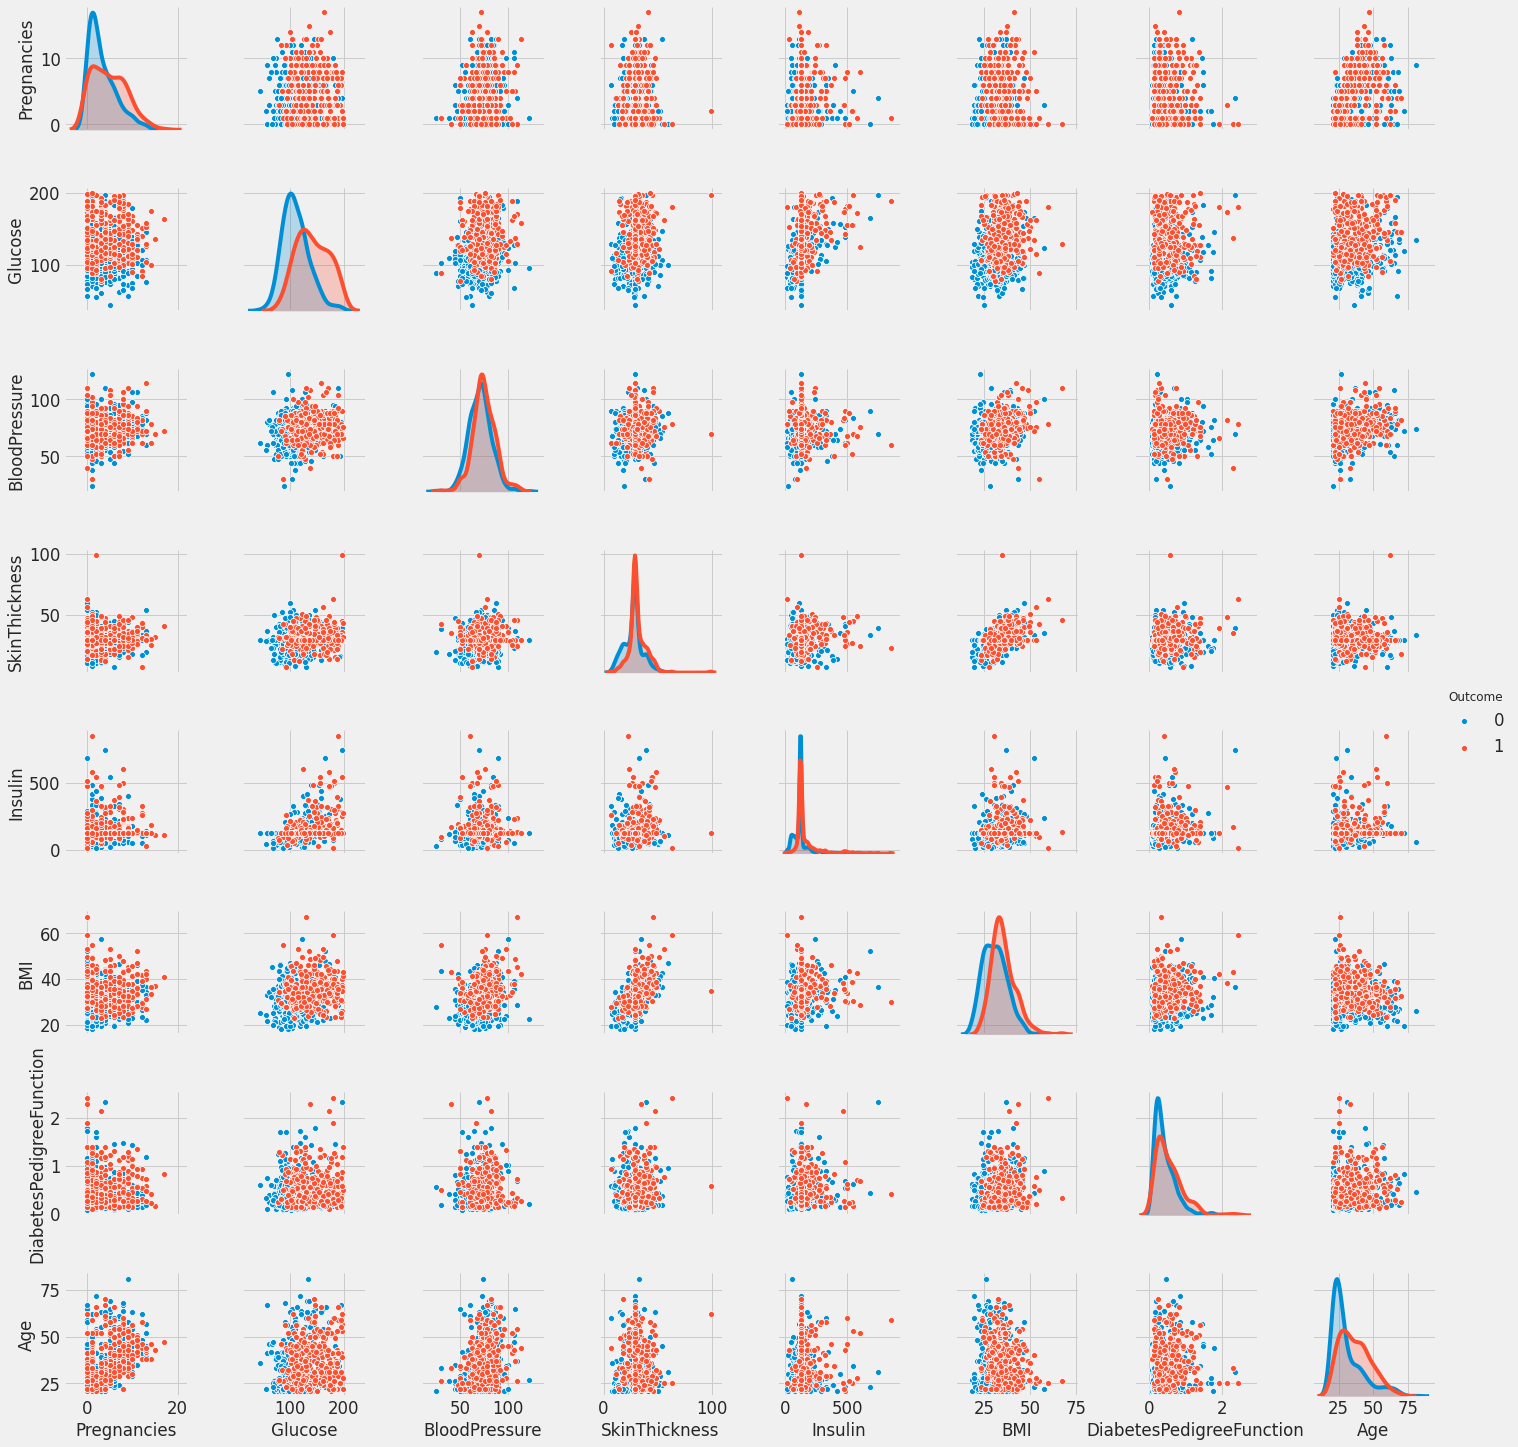

In [ ]:
p = sns.pairplot(df_copy, hue = 'Outcome') 

`About Stratify` : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

`For example`, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, `stratify=y` will make sure that your random split has 25% of 0's and 75% of 1's.


## Let's scale down our dataFrame using StandardScalar:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x =  pd.DataFrame(sc.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']) 

In [ ]:
x.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
y = df_copy['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=42, stratify=y)

## Let's build our KNNClassifier for Diabetes Prediction:

k-NN does not have a loss function that can be minimized during training. In fact, this algorithm is not trained at all. The only "training" that happens for k-NN, is memorising the data (creating a local copy), so that during prediction you can do a search and majority vote. Technically, no function is fitted to the data, and so, no optimization is done (it cannot be trained using gradient descent).

In [ ]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_index))))  

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_index)))) 

Max test score 76.5625 % and k = [11]


## Result Visualization

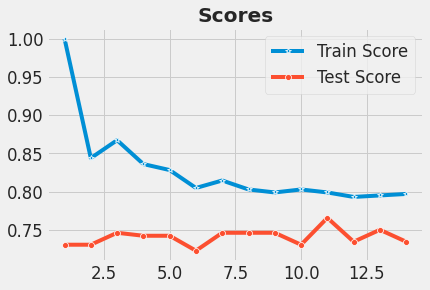

In [ ]:
p = sns.lineplot(range(1,15), train_scores, marker='*', label='Train Score')
p = sns.lineplot(range(1,15), test_scores, marker='o', label='Test Score') 
plt.title("Scores", fontweight='bold');

The best result is captured at k = 11 hence 11 is used for the final model:

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(x_train, y_train)
knn.score(x_test, y_test) 

0.765625

For Reference: [confusion](https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327)

## Let's plot the confusion Matrix:

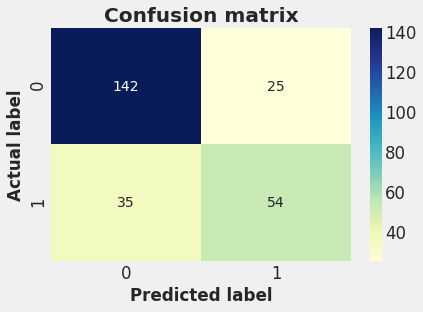

In [ ]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt='g'); 
plt.title('Confusion matrix', fontweight='bold')
plt.ylabel('Actual label', fontweight='bold')
plt.xlabel('Predicted label', fontweight='bold');

## Let's see the Classification Report:

In [ ]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



## Summary

You now have learned to:

* In-depth understanding of Exploratory Data Analysis
* Intuitively understand what KNNClassifier is
* Preprocess data for the classifier
* Visualize Model performance


## References
- [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
-  [EDA](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- [Paper](https://research.nii.ac.jp/ntcir/workshop/OnlineProceedings8/NTCIR/07-NTCIR8-PATMN-CaiY.pdf)